In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)

Accuracy: 0.8709122203098106

Training Accuracy score: 0.8763464024127531
Testing Accuracy score: 0.8709122203098106
classification_report 
               precision    recall  f1-score   support

         0.0       0.90      0.78      0.84       244
         1.0       0.86      0.93      0.89       337

    accuracy                           0.87       581
   macro avg       0.88      0.86      0.86       581
weighted avg       0.87      0.87      0.87       581



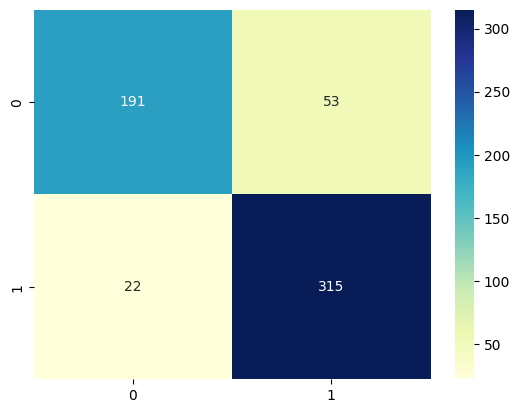

In [3]:
from sklearn.neural_network import MLPClassifier



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

# Build the model
mlp = MLPClassifier( activation='relu', solver='adam', max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print('Accuracy:', accuracy)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()